## Lab 3: Asking a statistical question
This week we are going to concentrate on asking a statistical question. This process almost always consists of 3+ steps:

1. Writing down in words very precisely what question you are trying to ask.
2. Translating the precise english question into a mathematical expression. This often includes determining the pdf of the background (possibly including trials), and the to integral to do to obtain a probability.
3. Coverting the probability into equivalent sigma

So in this lab we will assume that we know the form of the signal-free background distribution (determining a distribution from data will be next week's lab). In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses.

### Problem 1
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (18,12)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

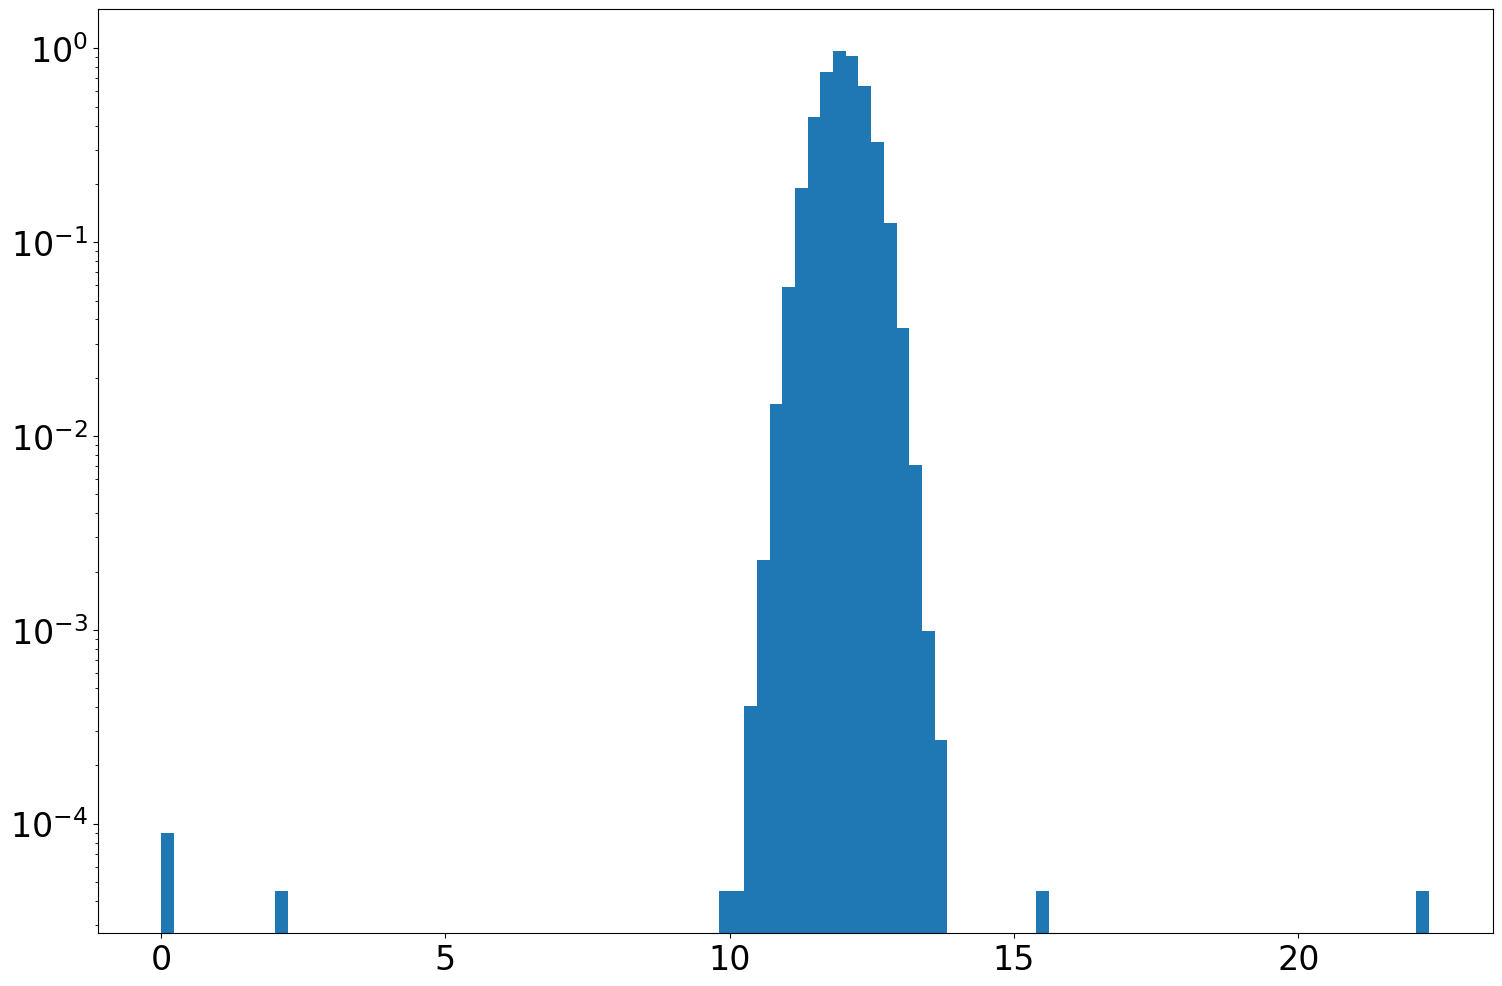

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

#### A) So our goal is to identify bad data and throw it out.

1. Start by exploring the data you have created with appropriate plots
2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
3. Restate your question in math. Be very clear.
4. Apply your statistical test and construct a truth table.
True T	Bad T
Your Test Good		
Your Test Bad	
The idea is how often you kept the known good data (True T & Your Test Good), how often you correctly discarded bad data (Bad T & Your Test Bad), and how often mistakes were made of either omission or commission (off diagonals).


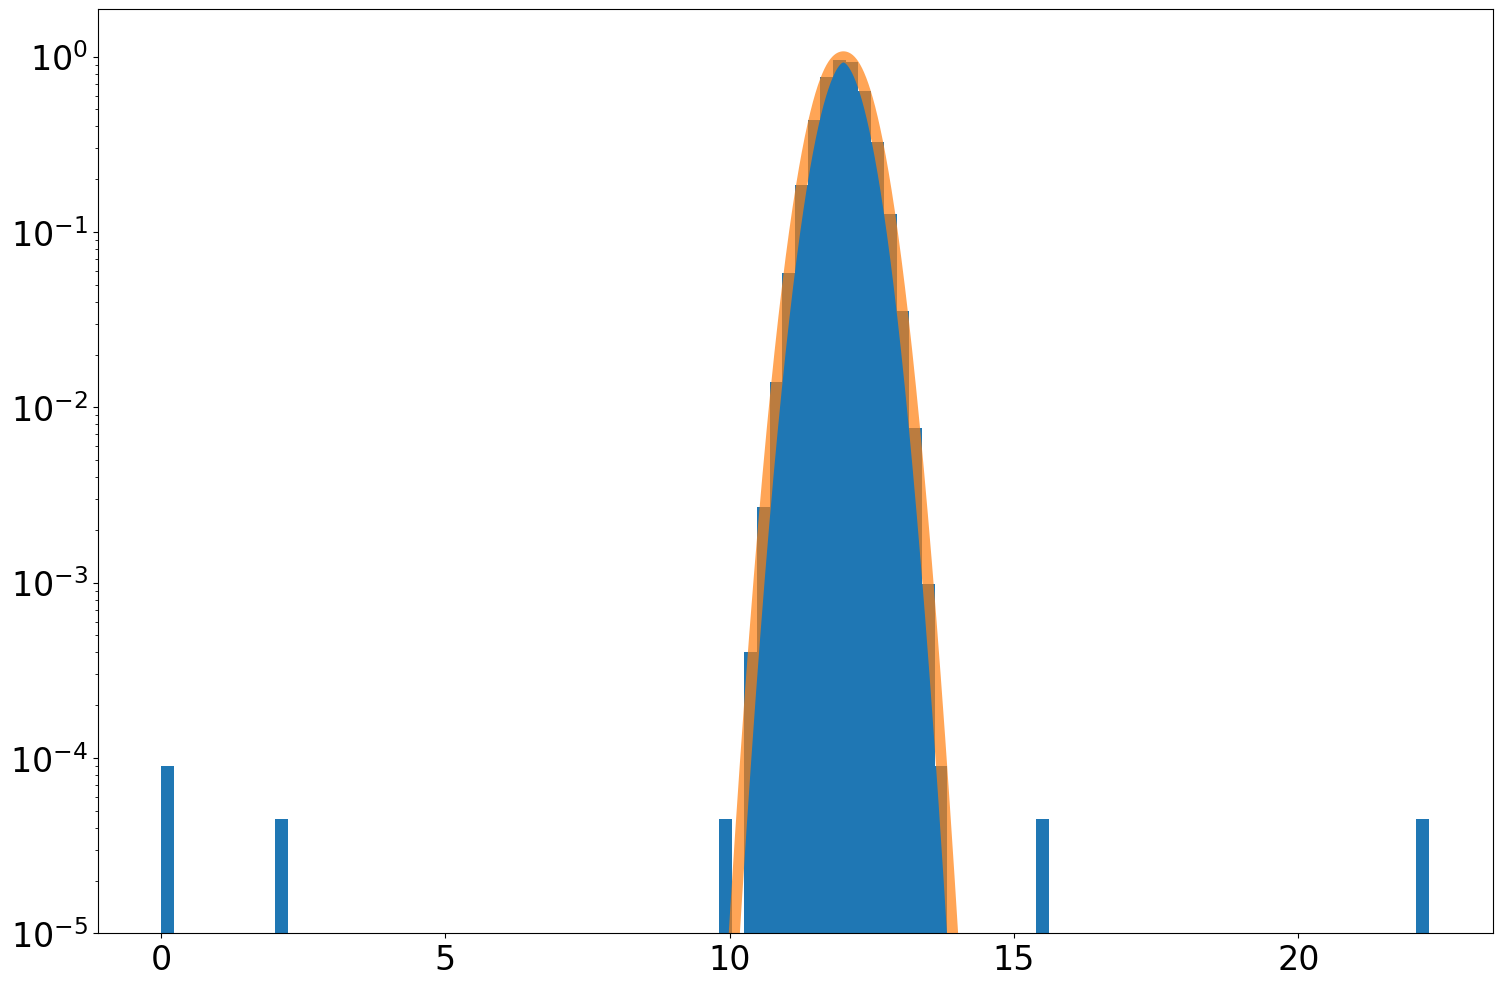

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 8,alpha = 0.7)
plt.ylim(10**-5)
plt.show()

#### Q1.A.2
State the statistical question in words: What is the chance my signal was just a random fluke, and the signal don't really exist?

#### Q1.A.3
Restate your question in math: 
if the probability of the signal has less than 4 sigma, then we would say it is a random fluke.

#### Q1.A.4
Apply your statistical test and construct a truth table.

In [4]:
prob5sigma = 1/3.5e6
det = stats.norm.ppf(1- prob5sigma, loc = 12., scale = 0.4)
det

14.000252573972153

In [5]:
prob5sigma = 1/3.5e6
det_min = stats.norm.ppf(prob5sigma, loc = 12., scale = 0.4)
det_min

9.999747426038471

In [6]:
prob4sigma = 0.9999
det4 = stats.norm.ppf(prob4sigma + (1-prob4sigma)/2, loc = 12., scale = 0.4)
det4

13.556236754565248

In [7]:
prob4sigma = 0.9999
det4_min = stats.norm.ppf((1-prob4sigma)/2, loc = 12., scale = 0.4)
det4_min

10.443763245434752

As we can see, our 5 sigma range is between 10.0 to 14.0. Therefore, we would have 3 points of bad T in our test good, they are 10.0, 10.3, and 12.7

As we can see, our 4 sigma range is between 10.44 to 13.56. Therefore, we would have 1 point of bad T in our test good, it is 12.7.

In [8]:
import pandas as pd

In [9]:
tru_test_bad = -5 # exclude 5 bad T
for i in d:
    if(i> det or i < det_min):
        tru_test_bad += 1
tru_test_bad

0

In [10]:
tru_test_bad_4 = -7 # exclude 5 bad T
fal = []
for i in d:
    if(i> det4 or i < det4_min):
        tru_test_bad_4 += 1
        fal.append(i)
tru_test_bad_4

8

In [11]:
f_data = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
count = 0
for i in fal:
    if(i in f_data):
        count += 1
count

7

In [12]:
q1_data = {' ':['Your test good','Your test bad'],'Ture T': [100000 - tru_test_bad_4,tru_test_bad_4], 'Bad T': [8-count, count]}
q1 = pd.DataFrame(data = q1_data) 
q1

,,Ture T,Bad T
0,Your test good,99992,1
1,Your test bad,8,7


#### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?



It is a predictable quantity, since we have already know the total good, bad data points and the statistical threshold. Hence, we can use the statistical threshold to calculate the detect position, then we can find all the data points that are out of this range minus the bad point we can sure they are out this range. Finally, we can know how many good data we threw out. 

#### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There is one bad point involved inside. To avoid the bad data, we should narrow down our statistical threshold, to make it smaller, however, if we narrow down our statistical threshold, the number of omissions would go larger as we decrease the statistical threshold.

### Problem 2
In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

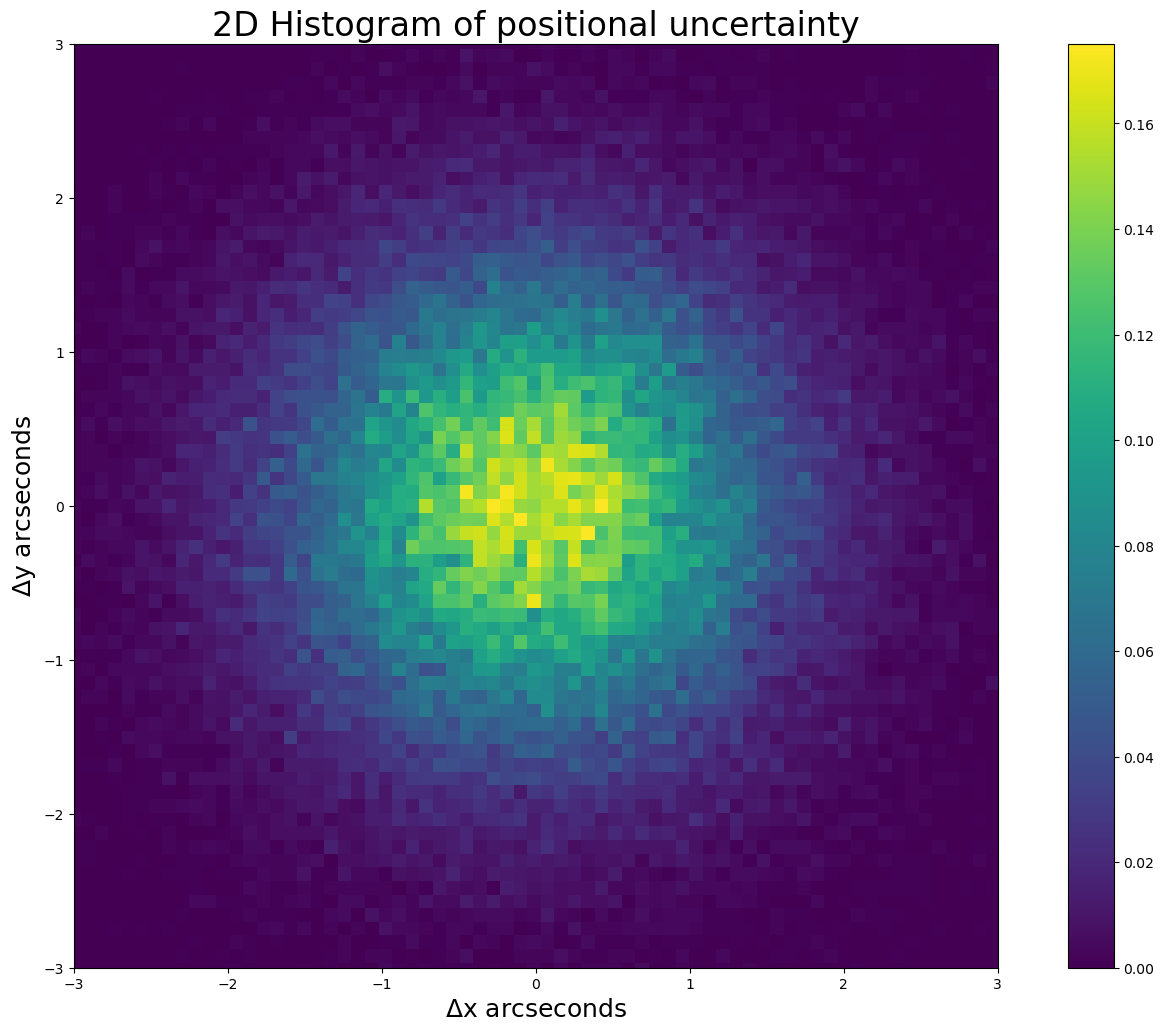

In [13]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

1. What is the question in words?
2. What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]
3. What distance in arcseconds represents a 5 sigma detection of motion?

#### Q2.1
What is the question in words?

In [14]:
prob5sigma = 1/3.5e6
det = stats.norm.ppf(1- prob5sigma, loc = 0., scale = 1)
det

5.000631434930381

If there is no signal, then we expect the background to be two guassian distribution, x and y direction, with means at 0. Hence, what is the probability of the background producing a movement which is greater than (5,5)

#### Q2.2
What is the question in math?

find the probability greater then (5,5) with the background pdf(). Then find the integral 

In [15]:
p = 1 - stats.norm.cdf(det,loc = 0, scale = 1)
p

2.8571428567492063e-07

#### Q2.3
What distance in arcseconds represents a 5 sigma detection of motion?

The distance in arcsecond represents a 5 sigma detection motion is (5,5), since the 5 sigma detection for x is 5 and for y is 5 too since ther are the same gaussian distribution. Therefore, the movement is (5,5)

### Problem 3
As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

As always:

1. What is the question in words?
2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.
3. Convert to sigma.

There are some unique aspects to this problem. Make sure you explore them in your explanation.